# Numba

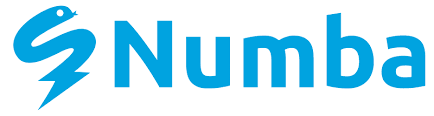

[Numba](https://numba.pydata.org) is an open source JIT (Just-In-Time) compiler that translates a subset of Python and NumPy code into fast machine code, using the [LLVM](https://llvm.org) compiler.

Lets optimize the Python dot-product using Numba. To this end we simply add a decorator, asking Numba to create machine code and compile it. Note that I'm in a fresh numba environment, because I did not manage to install Numba (or llmv) in the same environment as the Fortran compiler.

In [ ]:
import numba as nb
import numpy as np
N = 10000000
u = np.random.random(N)
v = np.random.random(N)

@nb.jit(nopython=True, fastmath=True, cache=True, parallel=True)  # <- decorator function
def nbdot(a, b):
    c = 0.0
    N = a.shape[0]
    for i in nb.prange(N):
        c += a[i]*b[i]
    return c

Run it once first to generate the code and compile

In [ ]:
c = nbdot(u, v) 

In [ ]:
%timeit c = nbdot(u, v)

# Cython

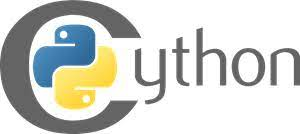

Cython is an optimising static compiler for both the Python programming language and the extended Cython programming language. It is similar to Python, but with strong typing, and it has to be compiled.

In [ ]:
%load_ext Cython

In [ ]:
%%cython
cimport cython 

@cython.boundscheck(False)
@cython.wraparound(False)
def cydot(double[::1] a, double[::1] b):
    cdef:
        double c = 0.0
        int i, N = a.shape[0]
    for i in range(N):
        c = c + a[i]*b[i]
    return c

In [ ]:
%timeit c = cydot(u, v)